In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from IPython.display import Image

import pandas as pd
import time
import re

## <font color='blue'> 1. '금융사기'  키워드 => 구글 기사 크롤링

In [2]:
# 웹드라이브로 크롬브라우즈 띄운다.
driver_path = "../driver/chromedriver.exe"
driver = webdriver.Chrome(executable_path=driver_path)

C:\Users\student\AppData\Local\Temp\ipykernel_5920\3620293503.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=driver_path)


In [3]:
url_page = 'https://www.google.com/'
driver.get(url_page)

In [4]:
# 검색창에 검색어 입력

search_word ='금융사기'
css_selector= 'body > div.L3eUgb > div.o3j99.ikrT4e.om7nvf > form > div:nth-child(1) > div.A8SBwf > div.RNNXgb > div > div.a4bIc > input' 
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).send_keys(search_word)

In [6]:
# 검색버튼 클릭

css_selector= 'body > div.L3eUgb > div.o3j99.ikrT4e.om7nvf > form > div:nth-child(1) > div.A8SBwf.emcav > div.UUbT9 > div.aajZCb > div.CqAVzb.lJ9FBc > center > input.gNO89b' 
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

In [7]:
# 뉴스 페이지 들어가기

css_selector = '#hdtb-msb > div:nth-child(1) > div > div:nth-child(3) > a'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

## <font color = 'blue'> 2. 뉴스 제목 크롤링 모듈 만들기

In [8]:
# 페이지 BeautifulSoup 객체로 가져온다
html = driver.page_source
soup = BeautifulSoup(html, "lxml") 

In [9]:
listOfsoup = soup.find('div','v7W49e')  #한페이지 전체 가져옴

In [10]:
listOfsoup = soup.find_all('div','xuvV6b BGxR7d')  # 기사별로 가져온다.
len(listOfsoup)  # 한페이지에 10개 기사 존재

10

In [11]:
# 1페이지 첫번째 기사 제목 가져오기 

listOfsoup[0].find('div','mCBkyc y355M ynAwRc MBeuO nDgy9d').get_text()

'새마을금고 “고위직 연루 380억원 대출사기, 송구…재발 방지” - 조선비즈'

In [12]:
#  1페이지 기사 10개 모두 가져오기
for idx in range(len(listOfsoup)):
    article = listOfsoup[idx].find('div','mCBkyc y355M ynAwRc MBeuO nDgy9d').text
    print(idx, article)

0 새마을금고 “고위직 연루 380억원 대출사기, 송구…재발 방지” - 조선비즈
1 가짜 다이아몬드로 새마을금고 상대 380억원 대출사기 일당 기소
2 가짜 다이아몬드 담보로 새마을금고 380억원 대출사기 일당 기소
3 가짜 다이아로 380억대 대출사기…새마을금고 간부도 유착 정황
4 은행 간부까지 얽혔다…380억 ‘가짜 다이아몬드’ 대출사기 전말
5 전남일보
6 [영상] 새마을금고 간부 대출사기에 가담...가능했던 이유는?
7 “기지국 노출 피하려고”…또 진화한 전화금융사기
8 새마을금고 왜 이러나...이번엔 고위직이 380억 원대 대출 사기 가담
9 한준호 의원, 노인 대상 금융사기 차단 복지법 개정안 발의


In [13]:
# 페이지를 넘겨가면서 기사 제목 모두 가져오기


from itertools import count

result = []

for idx in count(start=0, step=1):
    #if idx>10: #11부터 인쇄가 안됨
    #    break
    try:

        html = driver.page_source
        soup = BeautifulSoup(html, "lxml") 
        listOfsoup = soup.find('div','v7W49e').find_all('div','xuvV6b BGxR7d')

        for idx2 in range(len(listOfsoup)):
            article = listOfsoup[idx2].find('div','mCBkyc y355M ynAwRc MBeuO nDgy9d').get_text()
            print(article)
            result.append(article)



        # 페이지 다음버튼 누르기
        css_selector = '#pnnext > span:nth-child(2)'
        driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click() 
    
    except:  
        break  #페이지 끝까지 가면 멈춘다.

새마을금고 “고위직 연루 380억원 대출사기, 송구…재발 방지” - 조선비즈
가짜 다이아몬드로 새마을금고 상대 380억원 대출사기 일당 기소
가짜 다이아몬드 담보로 새마을금고 380억원 대출사기 일당 기소
가짜 다이아로 380억대 대출사기…새마을금고 간부도 유착 정황
은행 간부까지 얽혔다…380억 ‘가짜 다이아몬드’ 대출사기 전말
전남일보
[영상] 새마을금고 간부 대출사기에 가담...가능했던 이유는?
“기지국 노출 피하려고”…또 진화한 전화금융사기
새마을금고 왜 이러나...이번엔 고위직이 380억 원대 대출 사기 가담
한준호 의원, 노인 대상 금융사기 차단 복지법 개정안 발의
오픈씨 내부자 거래 수사, 금융사기로 끝날까?
목포경찰서-금융기관, 전화금융사기 근절 위한 업무협약 체결
경찰청 전화금융사기 특별자수 및 신고 기간 운영
‘왜 인적 없는 지하에서 돈을 세지?’···건물관리인 신고로 전화금융사기 수거책 체포
"골프 홀인원까지 거짓 청구…작년 보험사기액 9천434억원"
보험硏 '지난해 보험사기 적발액 9434억원…보험사기방지법 정비해야' - 서울경제
'골프 홀인원까지 거짓 청구…작년 보험사기액 9434억 원'
소상공인 손실보상 가장한 전화금융사기 주의
추경 등 소상공인 지원자금 지급? 해당 유형 보이스피싱·스미싱 급증
전국 돌며 1억7000만원 가로챈 전화금융사기 전달책 구속
월배농협, 전기통신금융사기 피해예방교육 실시
380억원 대출사기 새마을금고 "전액 상환…재발 방지책 마련"(종합)
"이윤주 수사관입니다"...전화금융사기의 진화
380억 대출사기에 새마을금고 “송구하다…전액 상환완료”
충남 보령경찰서-보령수협, 전화금융사기 업무협약 체결
모바일이 두려운 어르신, 은행에서 1대1 과외 받아요
경북경찰청,'전화금융사기 특별 자수·신고 기간' 운영
매월 4일은 '전화금융사기 근절의 날'…'일단 끊고 일단 의심'
가짜 보석 담보로 380억 대출사기…새마을금고 등친 일당 기소
검찰, 다단계 금융사기 의혹 루나 사태 수사 본격화 | 서울특별시 미디어재단 TBS
검

경찰청, 온라인 사기 범죄 총괄 대응 추진단 신설
OK저축은행, 고령자·복지관 직원 대상 금융사기 예방교육 실시
전주완산경찰서, 전화금융사기예방 은행원에 감사장
신종 부동산 대출 사기에 악용되는 '엉터리 공문서'...곳곳에 허점
OK저축은행, 금융사기 예방교육 < 금융 < 경제 < 기사본문
'옵티머스 펀드 사기' 김재현 2심 징역 40년…1심보다 15년 가중
보이스피싱 등 사기용 대포통장 유통 전문조직 23명 검거
614억 횡령 까맣게 몰랐던 우리은행 - 엉터리 감시시스템 또 반복?
OK저축은행, 고령자 대상 '금융사기 예방교육' 실시
60억 전세자금 대출사기...경찰 '무혐의'·검찰 '21명 적발' 왜?
경찰대학-두나무, 자금세탁·금융사기 방지 컨퍼런스
옥천경찰서, 전화금융사기 예방 옥천농협 군북지점 감사장수여
경찰청, 전기통신금융사기 통합신고대응 체계 구축 추진
보이스피싱 판치는 가상자산… 빗썸, 금융사기 피해 고객 지원 총력
웅촌농협, 지역어르신 대상 보이스피싱·금융사기 예방교육
서천경찰서, 전화금융사기 예방한 농협은행 서천군지부 대리에게 감사장 등 전달
당진경찰서-농협은행 당진시지부, 전화금융사기 예방 업무협약
KT-신한금융, 금융사기범죄 탐지·예방 기술개발 협력
진주경찰서장, 거액 전화금융사기 피해 막은 지역 농협직원 2명에 감사장
“부모님 신분증 보내면 대출” 청소년 속인 보이스피싱 일당, 1심 징역형
[미디어투데이] 계양경찰서, 전화금융사기 예방한 시민에게 감사장 수여
부친 장례 후 잠수탄 '100억원대 금융사기' 블루문펀드 대표 검거
법원 '인감·통장 빌려줬다면 이중대출 사기 책임져야'
코로나 대출 사기 문자… 여전히 활개 친다
‘고액 알바’ 지원했다 '인간 대포통장'으로···보이스피싱 피의자 63% 청년구직자
신한금융, KT와 금융사기범죄 탐지·예방기술 개발
웰컴저축은행, 어르신 대상 금융교육 진행
피플펀드, 자체 AI 금융사기 탐지시스템 구축 완료
금산경찰서, 금융사기 피해 예방한 신협직원에게 감사장 수여
부천원미서, 전화금융사기 피해 예방 

In [14]:
mc_dict = {'기사제목'         : result}
df = pd.DataFrame(mc_dict)

In [15]:
df

,기사제목
0,"새마을금고 “고위직 연루 380억원 대출사기, 송구…재발 방지” - 조선비즈"
1,가짜 다이아몬드로 새마을금고 상대 380억원 대출사기 일당 기소
2,가짜 다이아몬드 담보로 새마을금고 380억원 대출사기 일당 기소
3,가짜 다이아로 380억대 대출사기…새마을금고 간부도 유착 정황
4,은행 간부까지 얽혔다…380억 ‘가짜 다이아몬드’ 대출사기 전말
...,...
295,서천경찰서-서천특화시장 상인회 '전화금융사기 예방' 업무협약
296,"웅촌농협, 원로조합원 대상 보이스피싱·금융사기 예방교육"
297,"BNK경남은행, 서부노인복지관에 ‘금융사기 예방 금융교육’ 지원"
298,"“코로나 지원금 신청하세요” 전화 사기, 당연히 의심했지만…"


In [18]:
df.to_csv("기사.csv", index=False, encoding="utf-8-sig")

### <font color = 'blue'> * 시각화 한글 오류 해결
> 참고 사이트 : https://operstu1.tistory.com/80 

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#print("버전",mpl.__version__)
#print('설정 위치', mpl.__file__)
#print('설정 위치', mpl.get_configdir())
#print('캐시 위치', mpl.get_cachedir())

In [21]:
print("설정파일위치", mpl.matplotlib_fname())

# 여기 경로 따라서 들어가기 
# 그 안에 있는 matplotlibrc 파일을 메모장으로 열어서 
# font_family 를 malgun Gothic 으로 고치기 
# ( 참고 : https://operstu1.tistory.com/80 )

설정파일위치 C:\Python\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [15]:
#font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
#print(len(font_list))

In [16]:
#font_list

In [17]:
#f = [f.name for f in fm.fontManager.ttflist]
#print(len(font_list))
#f  
#Malgun Gothic 존재함 -> 기본폰트를 Malgun Gothic 으로 수정하기 

## <font  color = 'blue'> 3. 금융사기 특이 수법 시각화
> 참고1  (NetworkX 사이트)   
> https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html

In [237]:
# 특이수법.txt 파일 참고

### <font color='blue'> version1

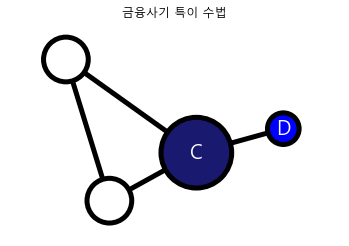

In [269]:
%matplotlib inline
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager


# 제목 
plt.rc('font', family='Malgun Gothic')  # 제목 글씨체 
plt.title('금융사기 특이 수법')



# 그래프 그리기
DG = nx.DiGraph()


# 노드 생성
A = '수법'
DG.add_node(A)
DG.add_node('B')
DG.add_node('C')
DG.add_node('D')


# 노드 연결
DG.add_edge(A, "B")
DG.add_edge(A, "C")
DG.add_edge('C','B')
DG.add_edge("C", "D")




# 시각화하기



# 노드 위치 고정
#pos = nx.shell_layout(DG)     또는 
pos = {A: (0, 0), "B": (-1, 0.5), "C": (2, 0.17), "D": (4, 0.255)} #위치(사용자지정)




# 화면 테두리 삭제
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")





options = {
    "font_size": 30,
    "node_size": [2000, 2000, 5000, 1000],
    "node_color": ["white",'white','midnightblue','blue'],
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
    'style' : '-',
    'arrowstyle' : '-'   
}


nx.draw_networkx(DG, pos, **options , 
                 with_labels=False )  



nx.draw_networkx_labels(DG, pos, 
                        font_family = 'Malgun Gothic',
                        font_size=20,
                        font_color= 'white',
                        #verticalalignment = 'top',   위치
                        #horizontalalignment = 'left',
                       )

plt.show()



# with_labels= True -> 꼭짓점에 이름 출력되게 한다. ( 단, 한글 인식이 안됨 )
# 문제해결 : draw_networkx_label 을 사용해서 따로 지정해주기

### <font color='blue'> version2

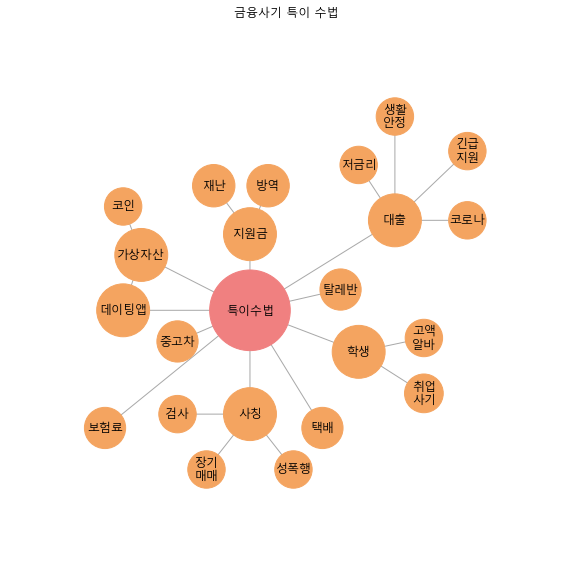

<Figure size 432x288 with 0 Axes>

In [427]:
%matplotlib inline
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager


plt.figure(figsize=(10,10)) #전체화면 크기 조정



# 제목 
plt.rc('font', family='Malgun Gothic')  # 제목 글씨체 
plt.title('금융사기 특이 수법')



# 그래프 그리기
DG = nx.DiGraph()


# 노드 생성
A  = '중고차'
B  = '지원금'; B1 = '재난'; B2 = '방역'
C  = '특이수법'
D  = '대출'; D1 = '코로나'; D2 = '긴급\n지원'; D3 = '생활\n안정'; D4='저금리'
E  = '학생'; E1 = '고액\n알바'; E2 = '취업\n사기'
F  = '가상자산'; F1 = '코인'
G  = '데이팅앱'
H  = '사칭'; H1='장기\n매매'; H2='성폭행'; H3='검사';
I  = '보험료' 
J  = '택배'
K  = '탈레반'


DG.add_node(A)
DG.add_node(B); DG.add_node(B1) ; DG.add_node(B2)
DG.add_node(C)
DG.add_node(D) ;DG.add_node(D1) ;DG.add_node(D2) ;DG.add_node(D3) ;DG.add_node(D4)
DG.add_node(E) ;DG.add_node(E1); DG.add_node(E2)
DG.add_node(F) ; DG.add_node(F1)
DG.add_node(G)
DG.add_node(H); DG.add_node(H1); DG.add_node(H2); DG.add_node(H3); 
DG.add_node(I); DG.add_node(J);  DG.add_node(K);     


# 노드 연결
DG.add_edge(A, C)
DG.add_edge(B, B1); DG.add_edge(B, B2)
DG.add_edge(C, B)
DG.add_edge(C, D)
DG.add_edge(D, D1); DG.add_edge(D, D2); DG.add_edge(D, D3); DG.add_edge(D, D4)
DG.add_edge(C, E)
DG.add_edge(E, E1); DG.add_edge(E, E2)
DG.add_edge(C, F); DG.add_edge(F, F1)
DG.add_edge(C, G)
DG.add_edge(F, G)
DG.add_edge(C, H); DG.add_edge(H, H1); DG.add_edge(H, H2) ;DG.add_edge(H, H3)
DG.add_edge(C, I); DG.add_edge(C, J) ; DG.add_edge(C, K)

# 시각화하기



# 노드 위치 고정
#pos = nx.shell_layout(DG)     또는 
pos = {A:  (0, 0.025), B: (2, 0.18), B1 : (1,0.25),  B2 : (2.5, 0.25),
       C:  (2, 0.07), D: (6, 0.2), D1 : (8,0.2), D2 : (8,0.3), D3 : (6,0.35), D4 : (5,0.28),
       E : (5, 0.01), E1 :(6.8, 0.03), E2 : (6.8, -0.05), 
       F : (-1, 0.15), F1 : (-1.5, 0.22), G : (-1.5, 0.07),
       H : (2, -0.08), H1 : (0.8, -0.16), H2 : (3.2,-0.16), H3 :(0, -0.08),
       I : (-2, -0.1), J : (4, -0.1), K : (4.5, 0.1)}        #위치(사용자지정)



# 화면 테두리 삭제
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")



options = {
    "font_size": 30,
    "node_size": [1700, 2800, 1800,1800, 
                  6500, 2800, 1400, 1400, 1400, 1400, 
                  2800, 1400, 1500, 
                  2800, 1400, 2800, 
                  2800, 1400, 1400, 1400,
                  1700, 1700, 1700],
    "node_color": ["sandybrown",'sandybrown','sandybrown','sandybrown',
                   'lightcoral','sandybrown', 'sandybrown', 'sandybrown', 'sandybrown', 'sandybrown', 
                   'sandybrown' ,'sandybrown', 'sandybrown' ,
                   'sandybrown' ,'sandybrown', 'sandybrown',
                   'sandybrown', 'sandybrown', 'sandybrown', 'sandybrown',
                   'sandybrown', 'sandybrown', 'sandybrown'],
    "edge_color": "darkgray",
    "linewidths": 1,
    "width": 1,
    'style' : '-',
    'arrowstyle' : '-'   
}


nx.draw_networkx(DG, pos, **options , 
                 with_labels=False )  



nx.draw_networkx_labels(DG, pos, 
                        font_family = 'Malgun Gothic',
                        font_size=12,
                        font_color= 'black',
                        #verticalalignment = 'top',   위치
                        #horizontalalignment = 'left',
                       )

plt.show()


plt.savefig('savefig_default.png')



# with_labels= True -> 꼭짓점에 이름 출력되게 한다. ( 단, 한글 인식이 안됨 )
# 문제해결 : draw_networkx_label 을 사용해서 따로 지정해주기

In [236]:
# 데이터프레임으로 그리기 
# import pandas as pd
# df = pd.DataFrame({'from': ['A', 'B', 'C', 'A', 'E', 'D'],
#                    'to': ['D', 'A', 'E', 'C', 'A', 'E']
#                   })
# df
# pos = {'A': (0, 0), "B": (-1, 0.5), "C": (2, 0.17), "D": (4, 0.255),
#       'E' : (0,1)} #위치(사용자지정)


# g = nx.from_pandas_edgelist(df, 'from', 'to', create_using = nx.DiGraph())
# nx.draw(g,pos,with_labels=True)

In [21]:
df

,기사제목
0,"새마을금고 “고위직 연루 380억원 대출사기, 송구…재발 방지” - 조선비즈"
1,가짜 다이아몬드로 새마을금고 상대 380억원 대출사기 일당 기소
2,가짜 다이아몬드 담보로 새마을금고 380억원 대출사기 일당 기소
3,가짜 다이아로 380억대 대출사기…새마을금고 간부도 유착 정황
4,은행 간부까지 얽혔다…380억 ‘가짜 다이아몬드’ 대출사기 전말
...,...
295,서천경찰서-서천특화시장 상인회 '전화금융사기 예방' 업무협약
296,"웅촌농협, 원로조합원 대상 보이스피싱·금융사기 예방교육"
297,"BNK경남은행, 서부노인복지관에 ‘금융사기 예방 금융교육’ 지원"
298,"“코로나 지원금 신청하세요” 전화 사기, 당연히 의심했지만…"


## <font  color = 'blue'> 4. 워드클라우드

In [50]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from konlpy.tag import Okt
okt = Okt()

In [24]:
# 데이터프레임 -> 하나의 리스트로 바꾸기
word = df['기사제목'].tolist()

In [27]:
# 리스트 -> 한 문장으로 바꾸기 
word = ' '.join(word)

In [31]:
word_nouns = okt.nouns(word)
len(word_nouns) 

2584

In [34]:
one_words = []
two_words = []
etc_words = []

for noun in word_nouns:
    if len(noun) == 1:
        one_words.append(noun)
    elif len(noun) == 2:
        two_words.append(noun)
    else:
        etc_words.append(noun)
        
len(one_words), len(two_words), len(etc_words)

(194, 2031, 359)

In [111]:
# 한글자로 된 건 삭제 + '필요없는 단어 추가적으로 삭제'
stop_words = ['조선','비즈','피플','새마을금고','감사',
              '특별','검거','근절','주의','직원',
              '피해','금융','사기','구속','경찰청','일당','경찰서','업무']
stop_words.extend(one_words)
len(one_words)

# 새마을금고 삭제 -> 비리 관련기사때문
# 특별, 검거, 근절, 주의, 피해 같은 뻔한 글자는 제외

194

In [112]:
final_nouns = [word for word in word_nouns if word not in stop_words]
len(final_nouns)

1658

In [113]:
final_nouns[:10]

['고위', '연루', '대출', '송구', '재발', '방지', '가짜', '다이아몬드', '상대', '대출']

In [122]:
# 많이 나오는 단어

data  = nltk.Text(final_nouns, name='기사')
data  = data.vocab().most_common(25)


# data를 딕셔너리 형태로 변환
dict_data = dict(data)

In [123]:
data

[('전화', 102),
 ('예방', 79),
 ('대출', 53),
 ('보이스피싱', 34),
 ('범죄', 29),
 ('농협', 22),
 ('은행', 20),
 ('탐지', 20),
 ('경찰', 18),
 ('경남', 18),
 ('수거', 15),
 ('교육', 15),
 ('펀드', 14),
 ('시스템', 14),
 ('가짜', 13),
 ('기술', 12),
 ('은행원', 12),
 ('신고', 11),
 ('현금', 11),
 ('개발', 11),
 ('구축', 11),
 ('대상', 10),
 ('협약', 10),
 ('자수', 9),
 ('기간', 9)]

In [124]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      background_color='white'
                     ,relative_scaling =0.2).generate_from_frequencies(dict_data)

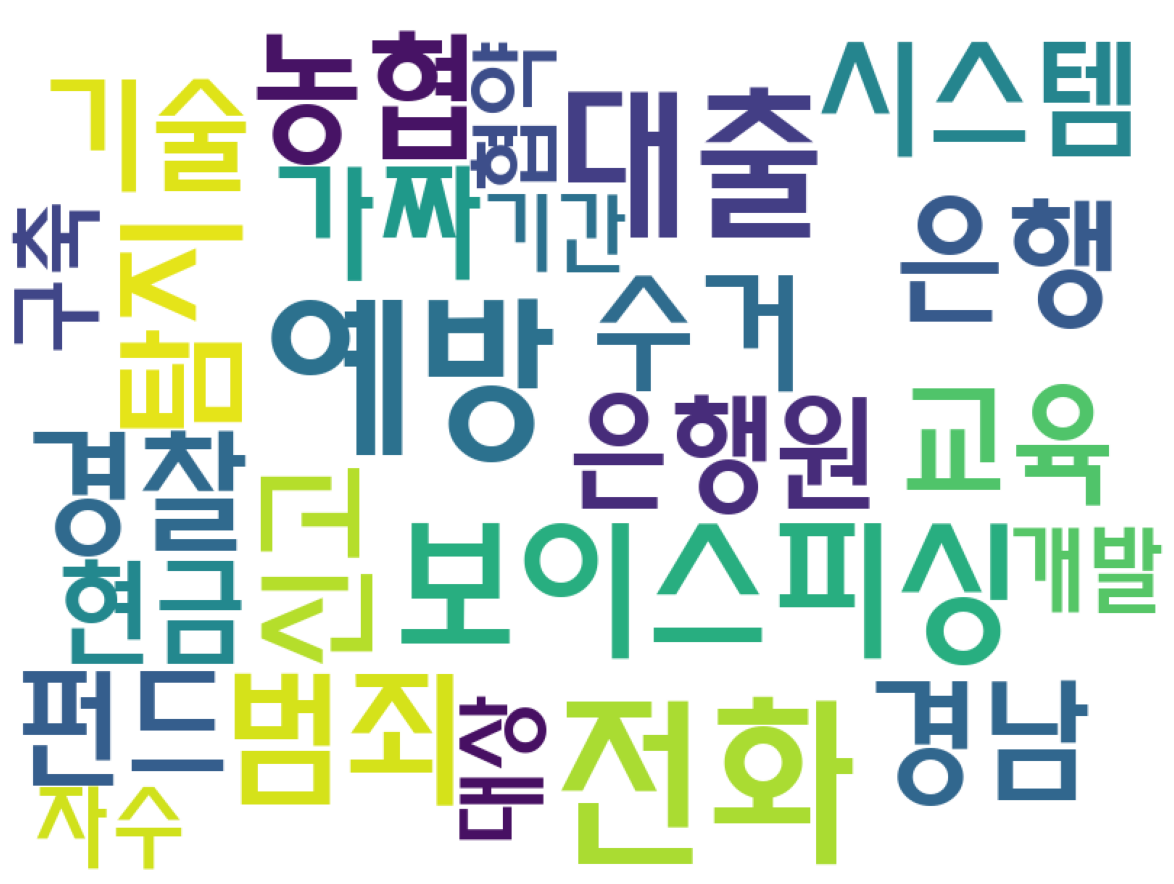

In [128]:
params = {
    "width"            : 800,
    "height"           : 600,
    "min_font_size"    : 2**3, 
    "max_font_size"    : 2**7, 
    "max_words"        : 100,
    "relative_scaling" : 0.2,
    # "font_path"        : 'C:/Windows/Fonts/malgun.ttf',
    "font_path"        : 'C:/Windows/Fonts/HMFMMUEX.TTC',
    "background_color" : 'white',
}

wordcolud = WordCloud(**params)
# wordcolud = wordcolud.generate(text) 
wordcolud = wordcolud.generate_from_frequencies(dict_data) 

save_img = 'wordcloud.png'

plt.figure(figsize=(24,16))
plt.imshow(wordcolud)
plt.axis('off')
plt.savefig(save_img)

In [80]:
# 할것1)  https://brunch.co.kr/@choobo/145


#  https://95pbj.tistory.com/34
# https://frhyme.github.io/python-lib/draw_network%28study%29/   #(고급)
# https://blog.daum.net/geoscience/1408
# https://zooyeonii.tistory.com/42

In [ ]:
#https://yoonpunk.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D-%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9C%BC%EB%A1%9C-%ED%8A%B9%EC%A0%95-%ED%82%A4%EC%9B%8C%EB%93%9C%EB%A5%BC-%ED%8F%AC%ED%95%A8%ED%95%98%EB%8A%94-%EC%8B%A0%EB%AC%B8%EA%B8%B0%EC%82%AC-%EC%9B%B9%ED%81%AC%EB%A1%A4%EB%A7%81-%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C-%EC%8B%9C%EA%B0%81%ED%99%94-%EB%B6%84%EC%84%9D-4-%EB%8B%A8%EC%96%B4-%EC%82%AC%EC%9A%A9-%EB%B9%88%EB%8F%84-%EC%B2%B4%ED%81%AC%ED%95%98%EA%B8%B0?category=810025

In [ ]:
# https://brunch.co.kr/@choobo/145 따라해볼 것 

# 2. 검색량같은 걸 년도별로 그래프 그리기 
# 3. 워드클라우드